### Importing Necessary Library

In [1]:
import opendatasets as od
import os

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

 ### Downloading Twitter Sentiment dataset from Kaggle

In [2]:
# Url has been taken from kaggle
Source = 'https://www.kaggle.com/datasets/kazanova/sentiment140'

In [3]:
od.download(Source)

Dataset URL: https://www.kaggle.com/datasets/kazanova/sentiment140


100%|█████████████████████████████████████████████████████████████████████████████| 80.9M/80.9M [00:30<00:00, 2.79MB/s]


##### Extracting Twitter Dataset

In [4]:
from zipfile import ZipFile
dataset = './sentiment140.zip'

with ZipFile(dataset,'r') as zip:
    zip.extractall()
    print('The dataset is extracted')

The dataset is extracted


In [5]:
pd.read_csv('./training.1600000.processed.noemoticon.csv',encoding='ISO-8859-1',)

,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew
...,...,...,...,...,...,...
1599994,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599995,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599996,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599997,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


In [6]:
# Adding column name on the twitter data
column_name = ['target','id','data','flag','user','text']

In [7]:
# Load the twitter csv data into pandas dataframe
twitter_data = pd.read_csv('./training.1600000.processed.noemoticon.csv',encoding='ISO-8859-1',names=column_name)

In [8]:
# Checking the number of columns and rows in the twitter dataframe
twitter_data.shape

(1600000, 6)

In [9]:
# Print the first 5 Rows of the dataframe
twitter_data.head(5)

,target,id,data,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


### Exploratory Data analysis

In [10]:
# Checking if there are any missing values in the dataframe.
twitter_data.isnull().sum()

target    0
id        0
data      0
flag      0
user      0
text      0
dtype: int64

In [11]:
# Checking the Distribution of trager column
twitter_data['target'].value_counts()

0    800000
4    800000
Name: target, dtype: int64

##### Converting the target values

In [12]:
# Converting the target value 4 into 1 for better analysis
twitter_data.replace({'target':{4:1}},inplace=True)

In [13]:
twitter_data['target'].value_counts()

0    800000
1    800000
Name: target, dtype: int64

#### Note

    * All the values have been converted 
    * 0 - Negative Tweet
    * 1 - Positive Tweet

#### Reducing the twitter dataset to 200000

In [14]:
Negative_Sentiment = twitter_data.loc[twitter_data['target']==0].head(100000)
Positive_Sentiment = twitter_data.loc[twitter_data['target']==1].head(100000)

In [15]:
# Creating New Data Frame
twitter = Negative_Sentiment.append(Positive_Sentiment)

C:\Users\gst\AppData\Local\Temp\ipykernel_8864\142313577.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  twitter = Negative_Sentiment.append(Positive_Sentiment)


In [16]:
twitter

,target,id,data,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
...,...,...,...,...,...,...
899995,1,1693956088,Mon May 04 00:27:13 PDT 2009,NO_QUERY,FelineBred,"@jvdouglas haha, no, the remark on maternity ..."
899996,1,1693956096,Mon May 04 00:27:14 PDT 2009,NO_QUERY,softthistle,@altitis and to you!
899997,1,1693956099,Mon May 04 00:27:14 PDT 2009,NO_QUERY,elysion32,Okie doke!! Time for me to escape for the Nort...
899998,1,1693956134,Mon May 04 00:27:14 PDT 2009,NO_QUERY,fancyjessy,"finished the lessons, hooray!"


In [17]:
# Again Count the target values
twitter['target'].value_counts()

0    100000
1    100000
Name: target, dtype: int64

## Natural Language Process

In [18]:
# Initialize the Porter_Stemmer Library
port_stem = PorterStemmer()

#### Function for Remvoing Stop Words, Setmming process for twitter dataset

In [19]:
def stemming(content):
    stemmed_content = re.sub('[^a-zA-Z]',' ',content)
    stemmed_content = stemmed_content.lower()
    stemmed_content = stemmed_content.split()
    stemmed_content = [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
    stemmed_content = ' '.join(stemmed_content)
    
    return stemmed_content

In [20]:
twitter['stemmed_content'] = twitter['text'].apply(stemming)

In [21]:
twitter.head()

,target,id,data,flag,user,text,stemmed_content
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",switchfoot http twitpic com zl awww bummer sho...
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,upset updat facebook text might cri result sch...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,kenichan dive mani time ball manag save rest g...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,whole bodi feel itchi like fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",nationwideclass behav mad see


#### Negative Tweets Word Cloud

In [22]:
Negative_Tweets = twitter.loc[twitter['target']==0]

In [32]:
Negative_Tweets_join =' '.join(Negative_Tweets['stemmed_content'])

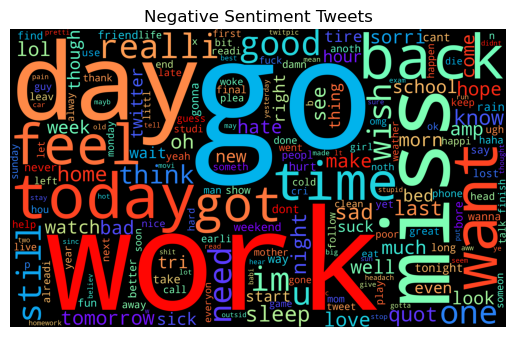

In [38]:
Negative_Tweets_Plot = WordCloud(width=3000,height=1800,background_color='black',colormap='rainbow',
                                collocations=False).generate(Negative_Tweets_join)

plt.title('Negative Sentiment Tweets')
plt.axis('off')
plt.imshow(Negative_Tweets_Plot)

#### Positive tweet Word Cloud

In [40]:
Positive_tweets =twitter.loc[twitter['target']==1]

In [41]:
Positive_tweets_join =' '.join(Positive_tweets['stemmed_content'])

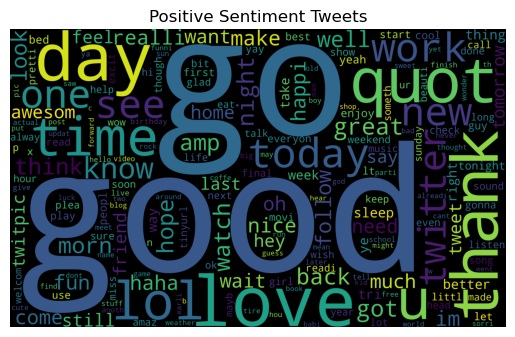

In [43]:
Positive_tweets_plot = WordCloud(width=3000,height=1800,background_color='black',colormap='viridis',
                                collocations=False).generate(Positive_tweets_join)

plt.title('Positive Sentiment Tweets')
plt.axis('off')
plt.imshow(Positive_tweets_plot)

#### Seperating the data an label

In [44]:
X = twitter['stemmed_content'].values
Y = twitter['target'].values

In [45]:
print(X)

['switchfoot http twitpic com zl awww bummer shoulda got david carr third day'
 'upset updat facebook text might cri result school today also blah'
 'kenichan dive mani time ball manag save rest go bound' ...
 'oki doke time escap north massa back turn get home folk'
 'finish lesson hooray' 'ppl fuck kp cb stop ask laa love boyfriend that']


In [46]:
print(Y)

[0 0 0 ... 1 1 1]


#### Spliting the dataset into training and test data

In [47]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=2)

In [48]:
print(X.shape,X_train.shape,X_test.shape)

(200000,) (160000,) (40000,)


#### Converting the textual data to numerical data

In [49]:
vectorizer = TfidfVectorizer()

X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [50]:
print(X_train)

  (0, 51800)	0.6273588580525712
  (0, 93387)	0.5664135825251267
  (0, 93053)	0.35262731710779033
  (0, 36193)	0.40156007269571387
  (1, 79248)	0.2283272734629939
  (1, 33850)	0.1187144347688129
  (1, 37742)	0.2540929124992177
  (1, 99909)	0.36578097926748016
  (1, 53941)	0.20396344900604998
  (1, 9302)	0.17112704705021425
  (1, 38673)	0.12801639683567398
  (1, 53238)	0.36578097926748016
  (1, 70587)	0.18757501067044477
  (1, 9787)	0.19899077231135093
  (1, 74336)	0.19949497255309473
  (1, 90278)	0.1291563840768679
  (1, 87089)	0.15989828168170234
  (1, 53239)	0.37826056465148805
  (1, 89970)	0.2671221275718026
  (1, 81071)	0.37826056465148805
  (2, 60364)	0.13093656805354603
  (2, 25303)	0.18768107817170482
  (2, 4443)	0.9734636244065136
  (3, 17326)	0.54213758483391
  (3, 84867)	0.35316313246081943
  :	:
  (159996, 64453)	0.28032278668421506
  (159996, 89661)	0.15977936776743507
  (159997, 22600)	0.5519842686451296
  (159997, 52579)	0.47723163823666687
  (159997, 2627)	0.2940092019422

In [51]:
print(X_test)

  (0, 80310)	0.36096115405782864
  (0, 40059)	0.2557618632656259
  (0, 34886)	0.37854321497769894
  (0, 33286)	0.3357136752960912
  (0, 32772)	0.20880490219452338
  (0, 28518)	0.532582346297229
  (0, 23553)	0.47016043475153046
  (1, 96468)	0.20320932972357594
  (1, 69897)	0.26399846258183024
  (1, 39221)	0.43236738909944616
  (1, 32772)	0.17293815213972805
  (1, 23878)	0.5180755693094954
  (1, 14734)	0.29748347958359533
  (1, 14326)	0.3451451885925409
  (1, 12949)	0.26626965087515186
  (1, 8936)	0.2782143410394475
  (1, 3228)	0.21871203112599535
  (2, 88406)	0.33757955322487504
  (2, 63461)	0.5265302767258954
  (2, 36922)	0.2821274818232978
  (2, 32772)	0.1844245063591865
  (2, 28574)	0.3669597847581597
  (2, 26881)	0.35571389616854376
  (2, 496)	0.48374139664959465
  (3, 98517)	0.26176801954448836
  :	:
  (39997, 92556)	0.243557555933562
  (39997, 80574)	0.20595385909052694
  (39997, 73864)	0.4242500843921958
  (39997, 62589)	0.3322157525676254
  (39997, 38264)	0.17338870903464226
  (

### Training the Machine Learning Model

In [52]:
model = LogisticRegression(max_iter=1000)

In [53]:
model.fit(X_train,Y_train)

LogisticRegression(max_iter=1000)

#### Model Evaluation

##### Accuracy Score

In [54]:
# Accurary Score on the Traing data
X_train_pretiction = model.predict(X_train)
training_data_accuracy = accuracy_score(Y_train,X_train_pretiction)

In [55]:
print('Accuracy score on the training data : ',training_data_accuracy)

Accuracy score on the training data :  0.8201125


In [56]:
# Accurary Score on the test data
X_test_pretiction = model.predict(X_test)
test_data_accuracy = accuracy_score(Y_test,X_test_pretiction)

In [57]:
print('Accuracy score on the training data : ',test_data_accuracy)

Accuracy score on the training data :  0.76965


##### Model Accuracy = 76.96 %

### Saving the trained model

In [58]:
import pickle

In [59]:
filename = 'Trained_Twitter_Model.sav'
pickle.dump(model,open(filename, 'wb'))

#### Using the saved model for future predictions

In [60]:
# loading the saved model
loaded_model = pickle.load(open('./Trained_Twitter_Model.sav','rb'))

In [61]:
X_new = X_test[200]
print(Y_test[200])

prediction = loaded_model.predict(X_new)
print(prediction)

if prediction[0] == 0:
    print('Negative Tweet')
    
else:
    print('Positive Tweet')

0
[0]
Negative Tweet


In [62]:
X_new = X_test[50]
print(Y_test[50])

prediction = loaded_model.predict(X_new)
print(prediction)

if prediction[0] == 0:
    print('Negative Tweet')
    
else:
    print('Positive Tweet')

0
[0]
Negative Tweet


### Note:
    * Our model is performing correctly.
    # Our model precdiction is correct.
    

##### Twitter Sentiment Analysis Prediction Completed --